In [34]:

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [50]:

cc=pd.read_csv('D:/UCM/ML/datasets/cc.csv')
 
x = cc.iloc[:,[1,2,3,4]]
y = cc.iloc[:,-1]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(x)

# Apply transform to both the training set and the test set.
x_scaler = scaler.transform(x)
pca = PCA(2)
x_pca = pca.fit_transform(x_scaler)
df2 = pd.DataFrame(data=x_pca)
finaldf = pd.concat([df2,cc[['TENURE']]],axis=1)
print(finaldf)
 

             0         1  TENURE
0    -0.786173  0.422114      12
1    -0.278329 -0.803393      12
2     0.255916 -0.630364      12
3     0.277478  0.873840      12
4    -0.510060 -0.341918      12
...        ...       ...     ...
8945 -0.542699 -0.074328       6
8946 -0.541276 -0.070474       6
8947 -0.758142  0.389568       6
8948 -0.803969  0.375511       6
8949 -0.157726  1.060230       6

[8950 rows x 3 columns]


c:\Users\Veerendra Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.6024088993073647


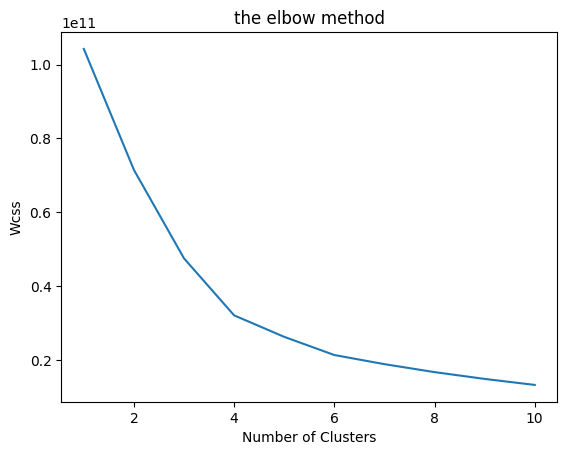

In [25]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(x)
X_scaled_array = scaler.transform(x)
X_scaled = pd.DataFrame(X_scaled_array, columns = x.columns)

from sklearn.cluster import KMeans
nclusters = 3 # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(x)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(x)
from sklearn import metrics
score = metrics.silhouette_score(x, y_cluster_kmeans)
print(score)


wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()


In [51]:
pd_speech=pd.read_csv('D:/UCM/ML/datasets/pd_speech_features.csv')
pd_speech
X = pd_speech.iloc[:, 1:-1]  
y = pd_speech.iloc[:, -1]  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(x)

# Apply transform to both the training set and the test set.
x_scaler = scaler.transform(x)
pca = PCA(2)
x_pca = pca.fit_transform(x_scaler)
df2 = pd.DataFrame(data=x_pca)
finaldf = pd.concat([df2,pd_speech[['DFA']]],axis=1)
print(finaldf)

from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm = SVC()

 
svm.fit(X_train, y_train)
# Evaluate the performance of the SVM model on the testing data
accuracy = svm.score(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')


             0         1      DFA
0    -0.786173  0.422114  0.71826
1    -0.278329 -0.803393  0.69481
2     0.255916 -0.630364  0.67604
3     0.277478  0.873840  0.79672
4    -0.510060 -0.341918  0.79782
...        ...       ...      ...
8945 -0.542699 -0.074328      NaN
8946 -0.541276 -0.070474      NaN
8947 -0.758142  0.389568      NaN
8948 -0.803969  0.375511      NaN
8949 -0.157726  1.060230      NaN

[8950 rows x 3 columns]
Test accuracy: 0.74


In [52]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
iris = pd.read_csv('D:/UCM/ML/datasets/iris.csv')
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)
print("Explained Variance Ratio:", lda.explained_variance_ratio_)
df_lda = pd.DataFrame(data=X_lda, columns=['LDA1', 'LDA2'])
final_df = pd.concat([df_lda, y], axis=1)
print(final_df.head())


Explained Variance Ratio: [0.98709288 0.01290712]
        LDA1      LDA2      Species
0 -10.036763 -0.451330  Iris-setosa
1  -9.172930 -1.477234  Iris-setosa
2  -9.480989 -0.979693  Iris-setosa
3  -8.818119 -1.408602  Iris-setosa
4  -9.960200 -0.112546  Iris-setosa
